<a href="https://colab.research.google.com/github/MtTake/PINNs/blob/main/2D_Navier_Eq_light_bat_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 弾性力学の支配方程式

- つり合い式 \\
- 適合条件式(変位-ひずみ関係式)
- 構成式(応力-ひずみ関係式) \\

### 1. つり合い式
　二次元で考えると、

$$
\frac{\partial \sigma_x}{\partial x} + \frac{\partial \tau_{xy}}{\partial y} + X = 0 \\
\frac{\partial \sigma_y}{\partial y} + \frac{\partial \tau_{xy}}{\partial x} + Y = 0 \\
 $$

### 2. 適合条件式

$$
\frac{\partial^2 \epsilon_x}{\partial y^2} + \frac{\partial^2 \epsilon_y}{\partial x^2} = \frac{\partial^2 \gamma_{xy}}{\partial x \partial y} \\
\epsilon_x = \frac{\partial u}{\partial x}, \quad
\epsilon_y = \frac{\partial v}{\partial y}, \quad
\gamma_{xy} = \frac{\partial u}{\partial y} + \frac{\partial v}{\partial x}
$$

### 3. 構成式

$$
\begin {Bmatrix}
       \epsilon_x \\
       \epsilon_y \\
       \epsilon_z \\
       \gamma_{xy} \\
       \gamma_{yz} \\
       \gamma_{zx}
\end {Bmatrix}
= \frac{1}{E}
\begin {bmatrix}
       1 & -\nu & -\nu & 0 & 0 & 0 \\
       -\nu & 1 & -\nu & 0 & 0 & 0 \\
       -\nu & -\nu & 1 & 0 & 0 & 0 \\
       0 & 0 & 0 & 2(1+\nu) & 0 & 0\\
       0 & 0 & 0 & 0 & 2(1+\nu) & 0 \\
       0 & 0 & 0 & 0 & 0 & 2(1+\nu)
\end {bmatrix}
\begin {Bmatrix}
       \sigma_x \\
       \sigma_y \\
       \sigma_z \\
       \tau_{xy} \\
       \tau_{yz} \\
       \tau_{zx}
\end {Bmatrix}
$$

# Navier の方程式

$$
G \left(\nabla^2u_i + \frac{1}{1-2\nu}\frac{\partial \epsilon_i}{\partial x_i}
 \right) + X_i = \rho \frac{\partial^2 u_i}{\partial t^2} \quad (i=1,2,3) \\
E=2G(1+\nu)
$$

$E$ : ヤング率($206GPa$)、$G$ :せん断弾性係数($79GPa$)、$\nu$ :ポアソン比($0.3$)、括弧内は鉄の場合．


静的釣合い条件では、時間微分の項はゼロとなり、$i$ を $x,y,z$ で書くと、

$$
G \left( \nabla^2u_x + \frac{1}{1-2\nu}\frac{\partial \epsilon_x}{\partial x}  \right) + F_x = 0 \\
G \left( \nabla^2u_y + \frac{1}{1-2\nu}\frac{\partial \epsilon_y}{\partial y} \right) + F_y = 0 \\
G \left( \nabla^2u_z + \frac{1}{1-2\nu}\frac{\partial \epsilon_y}{\partial z} \right) + F_z = 0
$$


# 損失関数

損失関数は、ニューラルネットワークの出力が連続体方程式を満たすようにする．具体的には、以下のような損失関数を定義：

$$ L_{\text{total}} = L_{\text{PDE}} + L_{\text{BC}} + L_{\text{IC}}. $$

- **PDE損失項** $L_{\text{PDE}}$：ネットワークの出力がPDEを満たすようにする損失．具体的には、次の手順で計算：

  1. ネットワークの出力 $u$、$\epsilon$、$X$ から、PDEに必要な偏微分を計算．
  2. PDEの左辺 $\mathcal{L}$ を計算し、その結果がゼロに近くなるようにする．
  3. 損失として、PDEの残差（$\mathcal{L}(u(x,t))$）の二乗和を使用．

$$
L_{\text{PDE}} = \frac{1}{3N_{\text{PDE}}} \sum_{j=1}^{N_{\text{PDE}}}  \sum_{i}^{x,y,z} \left( G \left(\nabla^2u_{ij} + \frac{1}{1-2\nu}\frac{\partial \epsilon_{ij}}{\partial x_{ij}} \right)
 + X_{ij} \right)^2
$$

- **境界条件損失項** $L_{\text{BC}}$：境界条件を満たすようにする損失

  例えば、$x = 0$ と $x = L$ での境界条件が $u_{BC}(0) = u_L$ と $u_{BC}(L) = u_R$ である場合、次のように計算：

$$
\begin{align}
L_{\text{BC}} &= \frac{1}{N_{\text{BC}}} \sum_{j=1}^{N_{\text{BC}}} \left(u(x_j) - u_{\text{BC}}(x_j) \right)^2 \\
&= \frac{1}{2} \sum_{j=1}^{N_{\text{BC}}} \{ \left( u(x_j=0) - u_{\text{BC}}(x_j=0)\right) + \left( u(x_j=L) - u_{\text{BC}}(x_j=L) \right) \} \\
&= \frac{1}{2} \sum_{j=1}^{N_{\text{BC}}} \{ \left( u(x_j=0) - u_{\text{L}}\right) + \left( u(x_j=L) - u_{\text{R}} \right) \} \\
\end{align}
$$

- **初期条件損失項** $L_{\text{IC}}$：初期条件（例えば、$x=0$ のときの $F_x$ の値）を満たすようにする損失．初期条件損失は次のように書ける：

  $$ L_{\text{IC}} = \frac{1}{N_{\text{IC}}} \sum_{k=1}^{N_{\text{IC}}} \left(F_x(x_k) - F_{x\text{IC}}(x_k) \right)^2, $$

  ここで、$u_{\text{IC}}$ は初期条件に従った値．

# 学習

PINNsのトレーニングは、損失関数 $L_{\text{total}}$ を最小化する．ネットワークの出力がPDE、境界条件、初期条件を満たすように重みが調整される．


### 1. ライブラリ インポート

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)

In [ ]:
# GPUが利用可能か確認
if torch.cuda.is_available():
    free_total = 0
    for i in range(torch.cuda.device_count()):

        # GPUメモリの情報を取得
        total_memory = torch.cuda.get_device_properties(i).total_memory
        reserved_memory = torch.cuda.memory_reserved(i)
        allocated_memory = torch.cuda.memory_allocated(i)
        free_memory = total_memory - reserved_memory
        free_total += free_memory

        print(f"GPU memory {i}: {total_memory / (1024 **3):.2f} GB")
        print(f"Reserved memory: {reserved_memory / (1024 **3):.2f} GB")
        print(f"Allocated memory: {allocated_memory / (1024 **3):.2f} GB")
        print(f"Free memory: {free_memory / (1024 **3):.2f} GB")
        print('------------------------------')

    print(f"Free Total memory : {free_total / (1024 **3):.2f} GB")

else:
    print("CUDA is not available")

GPU memory 0: 14.75 GB
Reserved memory: 0.00 GB
Allocated memory: 0.00 GB
Free memory: 14.75 GB
------------------------------
Free Total memory : 14.75 GB


### 2. 入力データの生成

In [ ]:
# パラメータ定義
num_points = 20  # X軸、Y軸の各サンプル数

N = 96             # 異なるデータセットの数
batch_size = 8    # バッチサイズ

size = 0.1     # [m]　平板サイズ
Fphy = 100     # [N]　入力荷重

n_in_out = 2 * num_points**2   # MLPの入力次元
n_make_out = 6 * num_points**2 # MLPの出力次元

# 物理定数
E = 206 * 10^9 # [Pa] ヤング率
G = 79 * 10^9  # [Pa] せん断弾性係数
nu = 0.3       #      ポアソン比

L = 1.0           # 正規化空間範囲
FX = 1.0          # 正規化荷重
N_bc = 20        # 境界条件数(片側)
# N_ic = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# カスタムデータセットの定義
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
# 訓練データの生成
def generate_data(num_pnts):
    # x と t の範囲を設定
    # torch.rand(num_points, 2) * 2 - 1
    # [-1, 1]の範囲でサンプルを生成
    x_plot = torch.rand(num_pnts) * 2 - 1  # [100]
    y_plot = torch.rand(num_pnts) * 2 - 1  # [100]

    # メッシュグリッドを作成
    # X_g は x_plot の値を列方向に繰り返した行列
    # Y_g は y_plot の値を行方向に繰り返した行列
    # X_g=[100, 100],Y_g=[100, 100]
    X_g, Y_g = torch.meshgrid(x_plot, y_plot, indexing='ij')

    # Flatten 行優先で1行目のあとに2行目を並べる
    X_flat = X_g.reshape(-1, 1) # [10000, 1]
    Y_flat = Y_g.reshape(-1, 1) # [10000, 1]

    # cat dim=1 で全組み合わせ (n,2)
    cat_data = torch.cat((X_flat, Y_flat), dim=1)  # [10000, 2]

    # [10000, 2] を [20000, 1] にreshape [x1,y1][x1,y2] ⇒ [x1,y1,x2,y2]
    reshaped_data = cat_data.view(-1)  # [20000]

    # print('x_plot',x_plot[:5])

    return reshaped_data.unsqueeze(0)  # [1, 20000] 0次元目を追加

In [ ]:
# 学習用のサンプルデータの生成
all_data = [generate_data(num_points) for _ in range(N)]

# データを結合し、[N, 20000]の形状に変換
combined_data = torch.cat(all_data)  # [N, 20000]
print('combined data = ', combined_data.shape)

# カスタムデータセットを作成
dataset = CustomDataset(combined_data)

# DataLoaderの作成
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

combined data =  torch.Size([96, 800])


### 3. ネットワークモデルの定義

In [ ]:
# ニューラルネットワークの定義
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(n_in_out, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        # self.bn2 = nn.BatchNorm1d(2048)
        self.fc3 = nn.Linear(2048, 1024)
        # self.fc4 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(1024, n_make_out)
        self.fc5 = nn.Sigmoid()
        self.apply(self.init_weights) # 重み初期化を適用

    def init_weights(self, m):
        if isinstance(m, nn.Linear):
            init.xavier_uniform_(m.weight)  # Xavier初期化
            if m.bias is not None:
                init.zeros_(m.bias)  # バイアスはゼロ初期化

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)
        # x = self.bn2(x)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.01)
        # x = F.leaky_relu(self.fc4(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc4(x), negative_slope=0.01)
        x = self.fc5(x)
        return x

### 4. Loss関数の定義

In [ ]:
# Navier方程式の計算
def derivatives(x, u):
    # 入力の順に合わせる　1次元が、{x1,y1,x2,y2,...,xn,yn}
    re_u = u.reshape(-1, num_points**2, 6)   # 配列の6次元を分離(N, n, 6)
    re_ux = re_u[:, :, :2].reshape(-1, 2*num_points**2)    # (N, 2*n)
    re_ex = re_u[:, :, 2:4].reshape(-1, 2*num_points**2)
    re_fx = re_u[:, :, 4:6].reshape(-1, 2*num_points**2)

    # Navier方程式計算
    u_x = torch.autograd.grad(outputs=re_ux, inputs=x, grad_outputs=torch.ones_like(re_ux),
                              create_graph=True, retain_graph=True)[0]
    # grad_outputs=torch.ones_like(u_x[:, 0])を指定するとxの最初の次元に関する勾配を計算
    u_xx = torch.autograd.grad(outputs=u_x, inputs=x, grad_outputs=torch.ones_like(u_x),
                                create_graph=True, retain_graph=True)[0]
    # u_yy = torch.autograd.grad(outputs=u_x, inputs=x, grad_outputs=torch.ones_like(u_x),
    #                             create_graph=True, retain_graph=True)[0]
    u_e = torch.autograd.grad(outputs=re_ex, inputs=x, grad_outputs=torch.ones_like(re_ex),
                              create_graph=True, retain_graph=True)[0]

    u_xx = u_xx.reshape(-1, 2)
    # u_yy = u_yy.reshape(-1, 2)
    u_e = u_e.reshape(-1, 2)
    u_f = re_fx.reshape(-1, 2)

    return u_xx, u_e, u_f

In [ ]:
# 境界条件の損失関数
def bound_loss(model, x_bc, u_bc):
    # 境界条件のデータを作成
    # 境界条件が先頭で、それ以外はランダムデータ
    bc_num = x_bc.size(1)                                   # 2番目の次元のサイズ
    bc_other_num = 2*num_points**2 - bc_num                 # 20000点群から境界点数を引く
    bc_other = generate_data(num_points)[:, :bc_other_num]  # 20000点群作成し、境界点以外の点群数だけ採用
    x_bc_all = torch.cat((x_bc, bc_other), dim=1)           # 境界点群とそれ以外を結合し、20000点群にする
    # print('gen_input data',num_points**2 - bc_num)
    # print('x_bc',x_bc.shape)
    # print('bc_other',bc_other.shape)
    # print('x_bc_all',x_bc_all.shape)

    x_bc_all = x_bc_all.to(device)
    u_bc = u_bc.to(device)

    # 境界条件損失
    bc_pred = model(x_bc_all)                            # MLPを通す

    # 入力x_tの順に合わせる　1次元が、{x1,y1,x2,y2,...,xn,yn}
    bc_pred_re = bc_pred.reshape(-1, num_points**2, 6)   # 配列の6次元を分離(N, n, 6)
    bc_pred_xy = bc_pred_re[:, :, :2].reshape(1, -1)     # (1, N*n*2)
    bc_pred_xy_n = bc_pred_xy[:, :bc_num]

    loss_bc = torch.mean((bc_pred_xy_n - u_bc)**2)

    # print(bc_pred_re.shape)
    # print(bc_pred_xy.shape)
    # print(bc_pred_xy_n.shape)

    return loss_bc

In [ ]:
# 初期条件の損失関数
def init_loss(model, x_ic, f_ic):
    # 初期条件のデータを作成
    # 初期条件が先頭で、それ以外はランダムデータ
    ic_num = x_ic.size(1)                                   # 2番目の次元のサイズ
    ic_other_num = 2*num_points**2 - ic_num
    ic_other = generate_data(num_points)[:, :ic_other_num]
    x_ic_all = torch.cat((x_ic, ic_other), dim=1)

    x_ic_all = x_ic_all.to(device)
    f_ic = f_ic.to(device)

    # 初期条件損失
    ic_pred = model(x_ic_all)                          # MLPを通す

    # 入力x_tの順に合わせる　1次元が、{x1,y1,x2,y2,...,xn,yn}
    ic_pred_re = ic_pred.reshape(-1, num_points**2, 6)   # 配列の6次元を分離(N, n, 6)
    ic_pred_xy = ic_pred_re[:, :, 4:6].reshape(1, -1)     # (1, N*n*2)
    ic_pred_xy_n = ic_pred_xy[:, :ic_num]

    loss_ic = torch.mean((ic_pred_xy_n - f_ic)**2)

    # print('x_ic',x_ic.shape)
    # print('f_ic',f_ic.shape)
    # print(ic_pred_xy_n.shape)

    return loss_ic

### 5. モデルの学習

In [ ]:
# ハイパーパラメータ
num_epochs = 10000
# num_epochs = 20000
# learning_rate = 0.001
learning_rate = 0.0001

# モデルの初期化
model = PINN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# ***** test *******************************************************************
cnt_t = 0
for x_t in data_loader:
    x_t = x_t.to(device)
    x_t.requires_grad = True                 # 勾配計算を可能にする

    # モデルの出力を計算
    u_t = model(x_t)  # [batch_size=N, 20000] ⇒ [N, 60000]

    # 入力x_tの順に合わせる　1次元が、{x1,y1,x2,y2,...,xn,yn}
    re_u_t = u_t.reshape(-1, num_points**2, 6)   # 配列の6次元を分離(N, n, 6)
    re_ux_t = re_u_t[:, :, :2].reshape(-1, 2*num_points**2)    # (N, 2*n)
    re_ex_t = re_u_t[:, :, 2:4].reshape(-1, 2*num_points**2)
    re_fx_t = re_u_t[:, :, 4:6].reshape(-1, 2*num_points**2)

    # Navier方程式計算
    u_x_t = torch.autograd.grad(outputs=re_ux_t, inputs=x_t, grad_outputs=torch.ones_like(re_ux_t),
                              create_graph=True, retain_graph=True)[0]
    u_xx_t = torch.autograd.grad(outputs=u_x_t, inputs=x_t, grad_outputs=torch.ones_like(u_x_t),
                                create_graph=True, retain_graph=True)[0]
    u_e_t = torch.autograd.grad(outputs=re_ex_t, inputs=x_t, grad_outputs=torch.ones_like(re_ex_t),
                              create_graph=True, retain_graph=True)[0]

    u_xx_t = u_xx_t.reshape(-1, 2)
    u_e_t = u_e_t.reshape(-1, 2)
    u_f_t = re_fx_t.reshape(-1, 2)

print(x_t.shape)
# print('x=',x_t[:5,:4])
print(u_t.shape)
# print('u=',u_t[:5, :12])

print('*** Output ***')
print(re_ux_t.shape)
print('re_ux=',re_ux_t[:5])
print(re_ex_t.shape)
print('re_ex=',re_ex_t[:5])
print(re_fx_t.shape)
print('re_fx=',re_fx_t[:5])

print('*** Derivatives ***')
print(u_x_t.shape)
print('u_x=',u_x_t[:5])
print(u_xx_t.shape)
print('u_xx=',u_xx_t[:5])
print(u_e_t.shape)
print('u_e=',u_e_t[:5])

print('境界条件')
x_lwr = torch.full((3, 1), -1)
x_upr = torch.full((3, 1), 1)
y_rnd = torch.rand((2*3, 1))

x_0 = torch.cat((x_lwr, x_upr), dim=0)
x_xy = torch.cat((x_0, y_rnd), dim=1)
print(x_xy.view(1, -1))

# 境界条件のデータ生成
x_1 = torch.cat((torch.full((N_bc, 1), -L), torch.full((N_bc, 1), L)), dim=0) # x=-1,x=1の位置の配列
y_rnd = torch.rand(2 * N_bc, 1)                                               # y軸は乱数
x_bc = torch.cat((x_1, y_rnd), dim=1)                                         # 列方向へ結合
x_bc = x_bc.view(1, -1)                                                       # 1行のデータにする
u_bc = torch.zeros((1, 2 * 2 * N_bc), dtype=torch.float32)                    # x=-1,x=1の境界条件の配列 x,yで2倍

# print('x_bc', x_bc.shape)
# print('u_bc', u_bc.shape)
model.eval().to(device)
loss_bc = bound_loss(model, x_bc, u_bc)
print('loss_bc = ', loss_bc)

# 初期条件
print('初期条件')
x_ic = torch.tensor([[0, 1]], dtype=torch.float32)                             # 荷重点を設定
f_ic = torch.tensor([[0, 1]], dtype=torch.float32)                             # 荷重を入れる

loss_ic = init_loss(model, x_ic, f_ic)
print('loss_ic = ', loss_ic)

torch.Size([8, 800])
torch.Size([8, 2400])
*** Output ***
torch.Size([8, 800])
re_ux= tensor([[0.5152, 0.5237, 0.4998,  ..., 0.5552, 0.4995, 0.5166],
        [0.4999, 0.5000, 0.5482,  ..., 0.5269, 0.4994, 0.5182],
        [0.4998, 0.4998, 0.4998,  ..., 0.5338, 0.4998, 0.5440],
        [0.4996, 0.4999, 0.5013,  ..., 0.4999, 0.4999, 0.5283],
        [0.5000, 0.5190, 0.4995,  ..., 0.5053, 0.4995, 0.4997]],
       device='cuda:0', grad_fn=<SliceBackward0>)
torch.Size([8, 800])
re_ex= tensor([[0.4999, 0.4995, 0.5059,  ..., 0.4993, 0.4997, 0.4998],
        [0.4999, 0.4996, 0.4998,  ..., 0.4989, 0.4996, 0.5000],
        [0.5143, 0.4998, 0.4999,  ..., 0.4996, 0.5029, 0.4999],
        [0.5234, 0.4993, 0.5179,  ..., 0.4995, 0.4998, 0.5000],
        [0.4999, 0.4997, 0.5024,  ..., 0.4991, 0.4999, 0.4999]],
       device='cuda:0', grad_fn=<SliceBackward0>)
torch.Size([8, 800])
re_fx= tensor([[0.5151, 0.5298, 0.5203,  ..., 0.4999, 0.5045, 0.5392],
        [0.5324, 0.5395, 0.4998,  ..., 0.5442, 0.516

In [ ]:
def clip_log(x):
    # 対数の引数がゼロまたは負でエラー発生するため、下限を設定
    return torch.log(torch.clamp(x, 1e-10, None))

total_error_record = []
nav_error_record = []
bc_error_record = []
ic_error_record = []

# 訓練ループ
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # 前のエポックで保存したモデルをロード
    if epoch > 0:
        model = torch.load('temp_model.pth')

    model.train()  # トレーニングモード

    # 前のエポックで使っていた不要なメモリを解放
    torch.cuda.empty_cache()  #GPUメモリの場合

    loss_total = 0

    for x in data_loader:
        x = x.to(device)
        x.requires_grad = True                 # 勾配計算を可能にする
        # モデルの出力を計算
        u = model(x)  # [batch_size, 20000] ⇒ [batch_size, 60000]

        # Navierの残差を計算
        u_xx, u_e, u_f = derivatives(x, u)
        derivatives_residual = G * (size**2 * (u_xx.sum(dim=1)) + 1/(1-2*nu)*(u_e.sum(dim=1))) + Fphy * (u_f.sum(dim=1))
        # derivatives_residual = (size**2 * (u_xx.sum(dim=1)) + 1/(1-2*nu)*(u_e.sum(dim=1))) + Fphy / G * (u_f.sum(dim=1))

        # 損失を計算 初期値が大のためLOGを取る
        # loss_nav = clip_log(torch.mean(derivatives_residual**2))
        loss_nav = torch.mean(derivatives_residual**2)

        # 境界条件のデータ生成
        x_1 = torch.cat((torch.full((N_bc, 1), -L), torch.full((N_bc, 1), L)), dim=0) # x=-1,x=1の位置の配列
        y_rnd = torch.rand(2 * N_bc, 1)                                               # y軸は乱数
        x_bc = torch.cat((x_1, y_rnd), dim=1)                                         # 列方向へ結合
        x_bc = x_bc.view(1, -1)                                                       # 1行のデータにする
        u_bc = torch.zeros((1, 2 * 2 * N_bc), dtype=torch.float32)                    # x=-1,x=1の境界条件の配列 x,yで2倍

        loss_bc = bound_loss(model, x_bc, u_bc)

        # 初期条件
        x_ic = torch.tensor([[0, 1]], dtype=torch.float32)                             # 荷重点を設定
        f_ic = torch.tensor([[0, 1]], dtype=torch.float32)                             # 荷重を入れる

        loss_ic = init_loss(model, x_ic, f_ic)

        loss = loss_nav + loss_bc + loss_ic

        loss_nav_rec = loss_nav.item()
        loss_bc_rec = loss_bc.item()
        loss_ic_rec = loss_ic.item()
        loss_total = loss.item()
        nav_error_record.append(loss_nav_rec)
        bc_error_record.append(loss_bc_rec)
        ic_error_record.append(loss_ic_rec)
        total_error_record.append(loss_total)

        # 逆伝播と最適化
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Total Loss: {loss.item()}, Navier Loss: {loss_nav.item()}, IC Loss: {loss_ic.item()}, BC Loss: {loss_bc.item()}')

# Loss の推移可視化
import matplotlib.pyplot as plt
plt.plot(range(1, len(total_error_record)+1),total_error_record,label="Total")
plt.plot(range(1, len(bc_error_record)+1),bc_error_record,label="Bound. Cond.")
plt.plot(range(1, len(ic_error_record)+1),ic_error_record,label="Init. Cond.")
plt.plot(range(1, len(nav_error_record)+1),nav_error_record,label="Navier")
plt.legend()

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

# y軸の範囲を指定
plt.plot(range(1, len(total_error_record)+1),total_error_record,label="Total")
plt.plot(range(1, len(bc_error_record)+1),bc_error_record,label="Bound. Cond.")
plt.plot(range(1, len(ic_error_record)+1),ic_error_record,label="Init. Cond.")
plt.plot(range(1, len(nav_error_record)+1),nav_error_record,label="Navier")
plt.legend()

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 0.4) # 最小値と最大値を指定
plt.show()


Epoch 0, Total Loss: 13719.2294921875, Navier Loss: 13718.7236328125, IC Loss: 0.2422429919242859, BC Loss: 0.26379191875457764
Epoch 100, Total Loss: 97.38455200195312, Navier Loss: 96.73971557617188, IC Loss: 0.248650923371315, BC Loss: 0.3961872160434723
Epoch 200, Total Loss: 57.4047966003418, Navier Loss: 56.86337661743164, IC Loss: 0.24445393681526184, BC Loss: 0.2969670295715332
Epoch 300, Total Loss: 61.2849235534668, Navier Loss: 60.57969665527344, IC Loss: 0.4123391807079315, BC Loss: 0.29288744926452637
Epoch 400, Total Loss: 1.221348762512207, Navier Loss: 0.37962546944618225, IC Loss: 0.47800230979919434, BC Loss: 0.36372098326683044
Epoch 500, Total Loss: 1.0040955543518066, Navier Loss: 0.30030006170272827, IC Loss: 0.42349207401275635, BC Loss: 0.28030338883399963
Epoch 600, Total Loss: 0.8214794397354126, Navier Loss: 0.08715503662824631, IC Loss: 0.4575066566467285, BC Loss: 0.27681776881217957
Epoch 700, Total Loss: 0.7535209655761719, Navier Loss: 0.0841408073902130

In [ ]:
# Loss の推移可視化
import matplotlib.pyplot as plt
plt.plot(range(1, len(total_error_record)+1),total_error_record,label="Total")
plt.plot(range(1, len(bc_error_record)+1),bc_error_record,label="Bound. Cond.")
plt.plot(range(1, len(ic_error_record)+1),ic_error_record,label="Init. Cond.")
plt.plot(range(1, len(nav_error_record)+1),nav_error_record,label="Navier")
plt.legend()

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

# y軸の範囲を指定
plt.plot(range(1, len(total_error_record)+1),total_error_record,label="Total")
plt.plot(range(1, len(bc_error_record)+1),bc_error_record,label="Bound. Cond.")
plt.plot(range(1, len(ic_error_record)+1),ic_error_record,label="Init. Cond.")
plt.plot(range(1, len(nav_error_record)+1),nav_error_record,label="Navier")
plt.legend()

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 0.4) # 最小値と最大値を指定
plt.show()

NameError: name 'bc_error_record' is not defined

In [ ]:
# 結果確認
# 境界条件と初期条件のサンプル
model.eval().to(device)
x_bc = torch.cat((torch.full((N_bc, 1), -L), torch.full((N_bc, 1), L)), dim=0) # x=-1,x=1の位置の配列
u_bc = torch.zeros((2 * N_bc, 1), dtype=torch.float32)                         # x=-1,x=1の境界条件の配列

x_ic = torch.tensor([[0, 1]], dtype=torch.float32)                             # 荷重点を(0,1)に設定
f_ic = torch.tensor([[0, 1]], dtype=torch.float32)                             # 荷重をfx=0,fy=1で入れる

loss_bc, loss_ic = loss_function(model, x_bc, u_bc, x_ic, f_ic)

print(x_bc.shape)
print('x_bc=', x_bc[:5])
print(u_bc.shape)
print('u_bc=', u_bc[:5])
print('x_ic=', x_ic)
print('f_ic=', f_ic)
print('loss_bc=', loss_bc)
print('loss_ic=', loss_ic)


torch.Size([200, 1])
x_bc= tensor([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]])
torch.Size([200, 1])
u_bc= tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])
x_ic= tensor([[0., 1.]])
f_ic= tensor([[0., 1.]])
loss_bc= tensor(0.2616, device='cuda:0', grad_fn=<AddBackward0>)
loss_ic= tensor(0.2179, device='cuda:0', grad_fn=<MulBackward0>)


# 6. 結果の可視化

X = 0.010101011
Y = 1.0
FX= 0.40205565
FY= 0.47636572


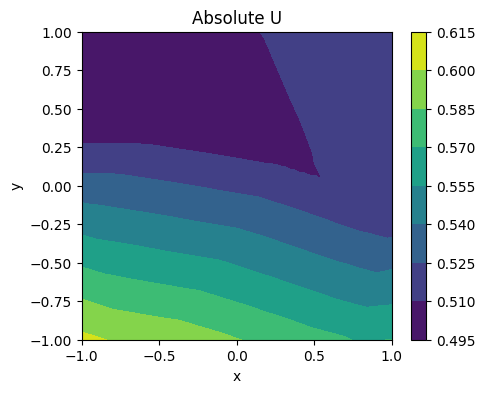

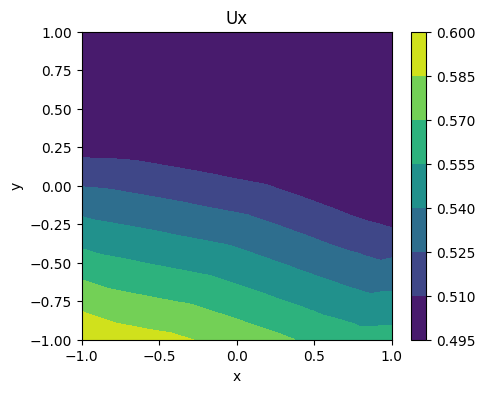

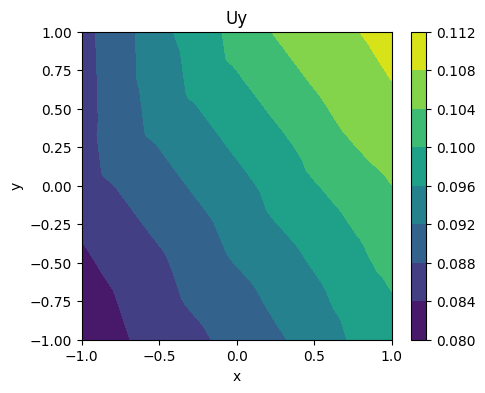

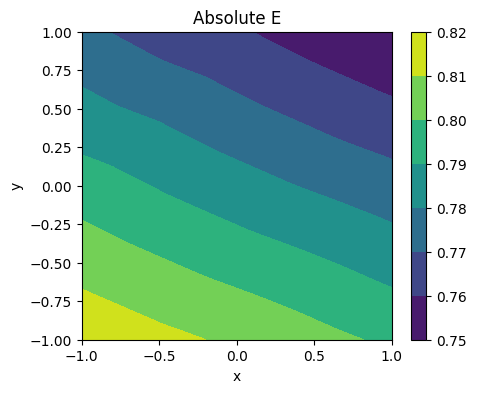

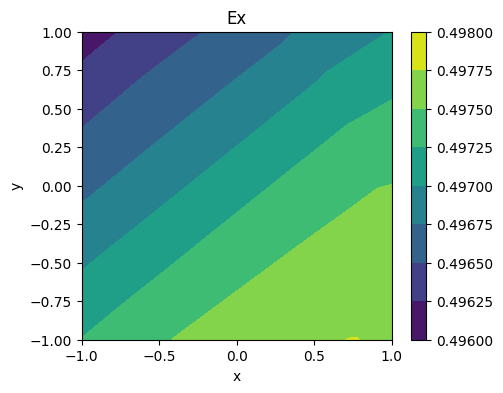

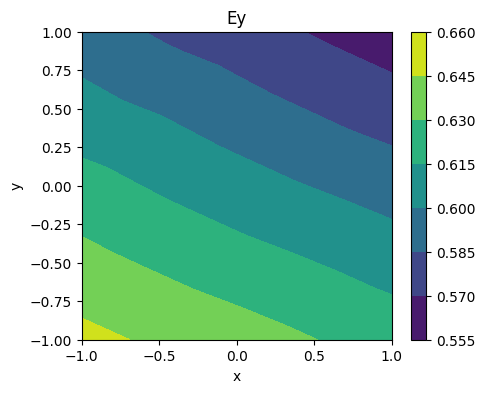

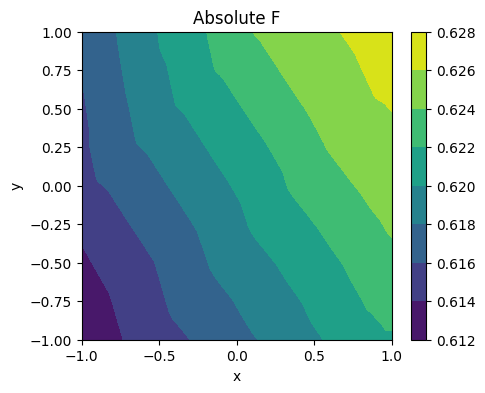

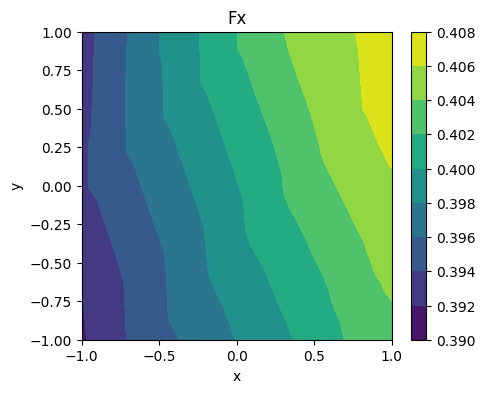

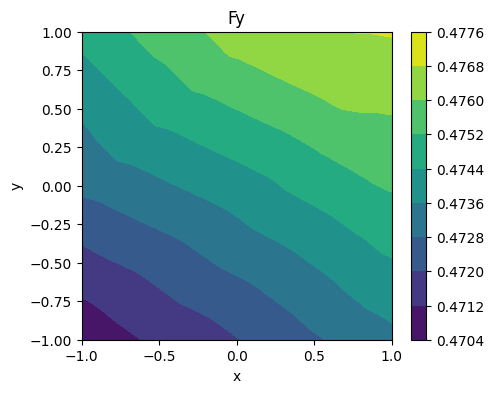

In [ ]:
# 結果の可視化
def plot_solution(net, x, y):
    with torch.no_grad():
        net.eval().to(device)
        x = x.to(device)
        y = y.to(device)
        # ネットワークの出力を計算
        # 全組み合わせ[10000, 2]で、出力[10000, 6]を得る
        u = net(torch.cat((x, y), dim=1)).cpu().numpy()
        ux = u[:, 0]
        uy = u[:, 1]
        du = np.sqrt(ux**2 + uy**2)
        ex = u[:, 2]
        ey = u[:, 3]
        de = np.sqrt(ex**2 + ey**2)
        fx = u[:, 4]
        fy = u[:, 5]
        df = np.sqrt(fx**2 + fy**2)

        # x と t を 1D 配列に変換 ⇒ x= (10000,),t= (10000,)
        x = x.cpu().numpy().flatten()
        y = y.cpu().numpy().flatten()

        # メッシュグリッドの生成
        # 再度、[100, 100]にする、x,tをダブり抜きしてからmeshgrid
        # X, Y = np.meshgrid(np.unique(x), np.unique(y))
        X = x.reshape(100, 100)
        Y = y.reshape(100, 100)

        # u を 2D 配列に変換 [10000, 1]⇒[100, 100]
        UX = ux.reshape(len(np.unique(y)), len(np.unique(x)))
        UY = uy.reshape(len(np.unique(y)), len(np.unique(x)))
        DU = du.reshape(len(np.unique(y)), len(np.unique(x)))
        EX = ex.reshape(len(np.unique(y)), len(np.unique(x)))
        EY = ey.reshape(len(np.unique(y)), len(np.unique(x)))
        DE = de.reshape(len(np.unique(y)), len(np.unique(x)))
        FX = fx.reshape(len(np.unique(y)), len(np.unique(x)))
        FY = fy.reshape(len(np.unique(y)), len(np.unique(x)))
        DF = df.reshape(len(np.unique(y)), len(np.unique(x)))

        print('X =', X[50,99])
        print('Y =', Y[50,99])
        print('FX=', FX[50,99])
        print('FY=', FY[50,99])

        # プロット
        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, DU, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Absolute U')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, UX, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Ux')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, UY, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Uy')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, DE, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Absolute E')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, EX, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Ex')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, EY, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Ey')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, DF, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Absolute F')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, FX, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Fx')
        plt.show()

        plt.figure(figsize=(5, 4))
        contour = plt.contourf(X, Y, FY, cmap='viridis')
        plt.colorbar(contour)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Fy')
        plt.show()

# x と t の範囲を設定
x_plot = torch.linspace(-L, L, 100).reshape(-1, 1) # [100, 1]
y_plot = torch.linspace(-L, L, 100).reshape(-1, 1) # [100, 1]

# メッシュグリッドを作成
# X_g は x_plot の値を列方向に繰り返した行列
# Y_g は y_plot の値を行方向に繰り返した行列
# X_g=[100, 100],Y_g=[100, 100]
X_g, Y_g = torch.meshgrid(x_plot.squeeze(), y_plot.squeeze(), indexing='ij')

# Flatten 行優先で1行目のあとに2行目を並べる
# cat dim=1 で全組み合わせ (n,2)
X_flat = X_g.reshape(-1, 1) # [10000, 1]
Y_flat = Y_g.reshape(-1, 1) # [10000, 1]

# 結果をプロット
plot_solution(model, X_flat, Y_flat)


In [ ]:
# テスト：DataLoaderによるバッチ化

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# パラメータの設定
num_points = 100   # サンプル数
N = 10             # 異なるデータセットの数
batch_size = 32    # バッチサイズ
input_size = 2 * num_points**2 # MLPの入力次元
hidden_size = 64   # 隠れ層のサイズ
output_size = 1    # 出力次元（タスクに応じて調整）

# メッシュグリッドを使ったデータ生成関数
def generate_data(num_points):
    x_plot = torch.rand(num_points)  # [100]
    y_plot = torch.rand(num_points)  # [100]
    X_g, Y_g = torch.meshgrid(x_plot, y_plot, indexing='ij')

    # Flattenして [10000, 2] にする
    X_flat = X_g.reshape(-1, 1)  # [10000, 1]
    Y_flat = Y_g.reshape(-1, 1)  # [10000, 1]

    # 2次元のデータを結合
    data = torch.cat((X_flat, Y_flat), dim=1)  # [10000, 2]

    # [10000, 2] を [20000, 1] にリシェイプ [x1,y1][x1,y2] ⇒ [x1,y1,x2,y2]
    reshaped_data = data.view(-1)  # [20000]

    # print('x_plot',x_plot[:5])

    return reshaped_data.unsqueeze(0)  # [1, 20000]

# MLPの定義
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# カスタムデータセットの定義
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# モデルの初期化
model = MLP(input_size, hidden_size, output_size)

# ロス関数とオプティマイザの定義
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 学習用のサンプルデータの生成
all_data = [generate_data(num_points) for _ in range(N)]

# データを結合し、[N, 20000]の形状に変換
combined_data = torch.cat(all_data)  # [N, 20000]

# カスタムデータセットを作成
dataset = CustomDataset(combined_data)

# DataLoaderの作成
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 学習ループ
num_epochs = 100
for epoch in range(num_epochs):
    for batch_data in data_loader:
        # モデルにデータを通す
        outputs = model(batch_data)  # [batch_size, 20000]

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}] completed')



x_plot tensor([0.3473, 0.6478, 0.5834, 0.7076, 0.9441])
x_plot tensor([0.5654, 0.0471, 0.0802, 0.2047, 0.0337])
x_plot tensor([0.5007, 0.0330, 0.3761, 0.0936, 0.8633])
x_plot tensor([0.2677, 0.1162, 0.6453, 0.2611, 0.3900])
x_plot tensor([0.2764, 0.4132, 0.0826, 0.8676, 0.7016])
x_plot tensor([0.2880, 0.0314, 0.6679, 0.8656, 0.1837])
x_plot tensor([0.3995, 0.0952, 0.4833, 0.1087, 0.1398])
x_plot tensor([0.0839, 0.5443, 0.7774, 0.7607, 0.2438])
x_plot tensor([0.2674, 0.8934, 0.1134, 0.6843, 0.5050])
x_plot tensor([0.5517, 0.3045, 0.9912, 0.3803, 0.4361])
Epoch [10/100] completed
Epoch [20/100] completed
Epoch [30/100] completed
Epoch [40/100] completed
Epoch [50/100] completed
Epoch [60/100] completed
Epoch [70/100] completed
Epoch [80/100] completed
Epoch [90/100] completed
Epoch [100/100] completed


In [ ]:
dux_dxy.shape

torch.Size([5, 6])

In [ ]:
du_dx.shape


torch.Size([5, 6])